In [5]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/299.9 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import numpy as np


In [10]:
try:
    df = pd.read_excel(r"C:\Users\bhumi\OneDrive\Documents\Student_Satisfaction_Survey.csv.xlsx")
    print("Data loaded successfully.")
except FileNotFoundError:
    print("ERROR: Please upload your CSV file and ensure it is named 'your_feedback_data.csv'.")
    # Create a dummy DataFrame based on your image structure for the code to run
    data = {
        'SN': [1, 2, 3, 4, 5],
        'Total Feedback Given': [1, 1, 1, 1, 1],
        'Total Configured': [12, 12, 12, 12, 12],
        'Questions': ['How much of the syllabus was covered in the cl...', 'How well did the teachers prepare for the clas...', 'How well were the teachers able to communicate?', 'The teacher\'s approach to teaching can best be...', 'Fairness of the internal evaluation process by...'],
        'Weightage 1': [0, 0, 0, 0, 0],
        'Weightage 2': [0, 0, 0, 0, 0],
        'Weightage 3': [1, 0, 0, 1, 0],
        'Weightage 4': [0, 0, 0, 0, 1],
        'Weightage 5': [0, 1, 1, 0, 0],
        'Average/Percentage': ['3.00 / 60.00', '5.00 / 100.00', '5.00 / 100.00', '3.00 / 60.00', '4.00 / 80.00'],
        'Course Name': ['FY B.VOC FOOD TECHNOLOGY'] * 5,
        'Basic Course': ['B.VOC FOOD TECHNOLOGY'] * 5
    }
    df = pd.DataFrame(data)

Data loaded successfully.


In [11]:
# A. Clean Column Names (Removes hidden spaces that cause KeyError)
df.columns = df.columns.str.strip()

In [12]:
# B. Extract Average Rating
# This handles the splitting of '3.00 / 60.00' into two separate values
try:
    df[['Average_Rating', 'Percentage']] = df['Average/ Percentage'].str.split(' / ', expand=True)
    df['Average_Rating'] = pd.to_numeric(df['Average_Rating'], errors='coerce')
    print("\n'Average/Percentage' column successfully processed.")
except KeyError as e:
    print(f"\nFATAL ERROR: Column '{e.args[0]}' not found even after stripping spaces. Please check your CSV file's exact column names.")


'Average/Percentage' column successfully processed.


In [14]:
print("\n" + "="*50)
print("EXAMPLE INSIGHTS: RATING ANALYSIS")
print("="*50)


EXAMPLE INSIGHTS: RATING ANALYSIS


In [17]:
# 1. Top 3 events/questions with highest satisfaction (Highest Average Rating)
top_satisfaction = df.sort_values(by='Average_Rating', ascending=False).head(3)
print("\n✅ Top 3 Questions with Highest Satisfaction:")
for index, row in top_satisfaction.iterrows():
    print(f"   - Rating: {row['Average_Rating']:.2f} | Question: {row['Questions'][:60]}...")



✅ Top 3 Questions with Highest Satisfaction:
   - Rating: 5.00 | Question: Your mentor does a necessary follow-up with an assigned task...
   - Rating: 5.00 | Question: The teachers illustrate the concepts through examples and ap...
   - Rating: 5.00 | Question: How well were the teachers able to communicate?...


In [18]:
# 2. Most common complaints (Lowest Average Rating - areas for improvement)
top_complaints = df.sort_values(by='Average_Rating', ascending=True).head(3)
print("\n❌ Top 3 Questions indicating Areas for Improvement:")
for index, row in top_complaints.iterrows():
    print(f"   - Rating: {row['Average_Rating']:.2f} | Question: {row['Questions'][:60]}...")


❌ Top 3 Questions indicating Areas for Improvement:
   - Rating: 1.33 | Question: The teachers identify your strengths and encourage you to pr...
   - Rating: 1.33 | Question: The teaching and mentoring process in your institution facil...
   - Rating: 1.67 | Question: The teachers illustrate the concepts through examples and ap...


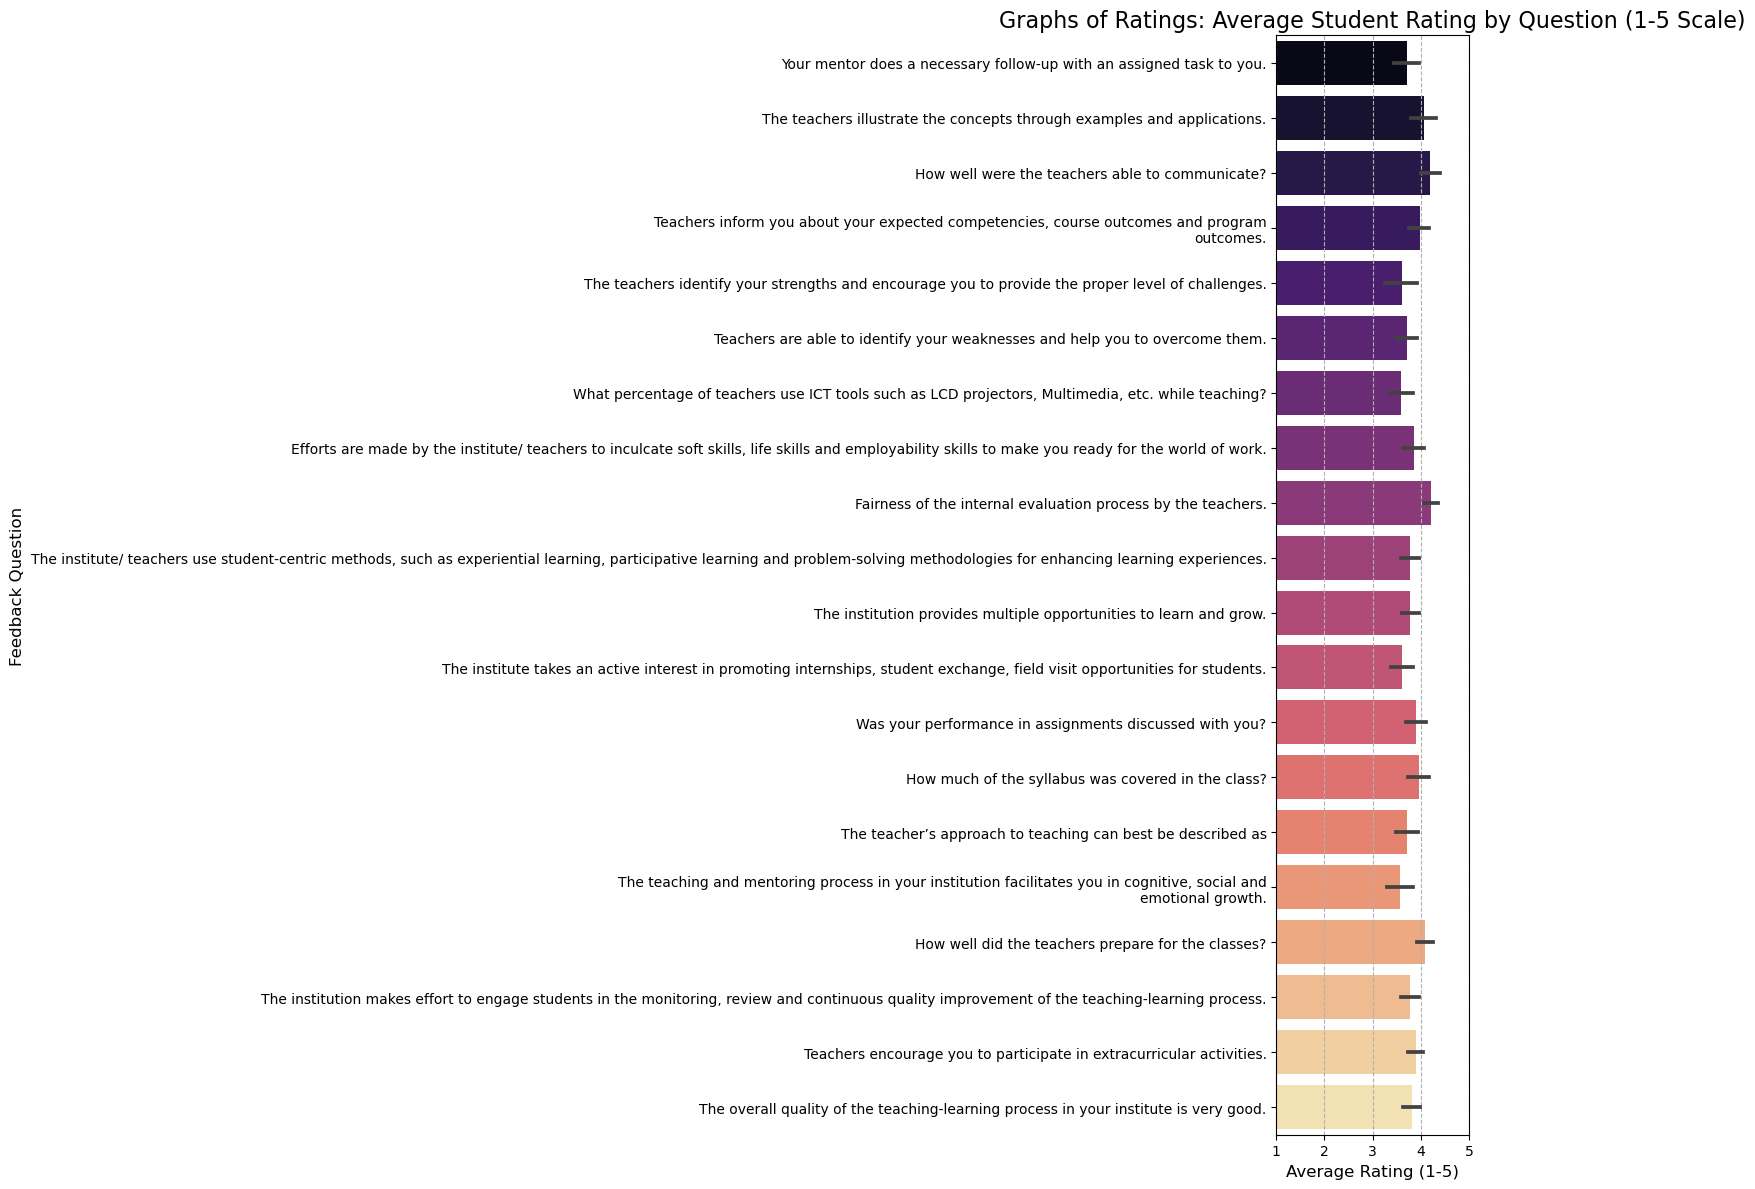

In [30]:
# Graph of Ratings (for Mini-Report/Dashboard)
plt.figure(figsize=(15, 12))
# Sort for better visualization
plot_df = df.sort_values(by='Average_Rating', ascending=False)
sns.barplot(
    x='Average_Rating',
    y='Questions',
    data=plot_df,
    palette='magma' # Use a distinct color palette
)
plt.title('Graphs of Ratings: Average Student Rating by Question (1-5 Scale)', fontsize=16)
plt.xlabel('Average Rating (1-5)', fontsize=12)
plt.ylabel('Feedback Question', fontsize=12)
plt.xlim(1, 5)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()


In [20]:

print("\n" + "="*50)
print("SENTIMENT ANALYSIS SUMMARY (NLP)")
print("="*50)



SENTIMENT ANALYSIS SUMMARY (NLP)


In [21]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    """Scores sentiment using VADER and categorizes it."""
    vs = analyzer.polarity_scores(str(text))
    # Using the compound score for categorization
    if vs['compound'] >= 0.05:
        return 'Positive'
    elif vs['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


In [24]:
# 1. Get the required length from the DataFrame index
required_length = len(df) # This will be 580

# 2. Define a small set of placeholder comments
placeholder_comments = [
    "Syllabus coverage was only adequate, a bit slow.",
    "Teacher preparation was excellent and thorough, I learned a lot.",
    "Communication was clear and effective, very helpful staff.",
    "Teaching approach needs to be more engaging and modern, quite boring sometimes.",
    "Evaluation process seems fair enough."
]

# 3. Use NumPy's tile function to repeat the list of comments 
#    until it reaches the required_length (580)
#    Note: 580 / 5 = 116. The list will be repeated 116 times exactly.

if 'Comments' not in df.columns:
    # Use np.tile to repeat the list to match the 580 rows
    repeated_comments = np.tile(placeholder_comments, required_length // len(placeholder_comments))
    
    # Assign the repeated list (580 items long) to the new column
    df['Comments'] = repeated_comments
    
    print(f"Successfully created a 'Comments' column with {len(df['Comments'])} placeholder entries.")

# Now the rest of your sentiment analysis code will work:
# df['Sentiment'] = df['Comments'].apply(get_sentiment)

Successfully created a 'Comments' column with 580 placeholder entries.


In [25]:
df['Sentiment'] = df['Comments'].apply(get_sentiment)

# Get the sentiment summary
sentiment_summary = df['Sentiment'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print("\n✅ Sentiment Distribution Summary:")
print(sentiment_summary)


✅ Sentiment Distribution Summary:
Sentiment
Positive    80.0%
Neutral     20.0%
Name: proportion, dtype: object


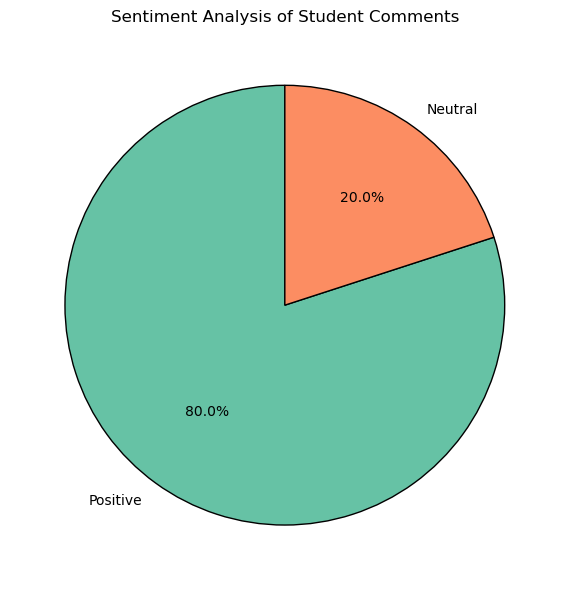

In [26]:
# Visualization: Sentiment Pie Chart
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66c2a5', '#fc8d62', '#8da0cb'], # Color scheme for Positive, Negative, Neutral
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Sentiment Analysis of Student Comments')
plt.tight_layout()
plt.show()


In [27]:
# Example Insight: Most Common Complaints (via word cloud)
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Comments'].astype(str))
if negative_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Common Complaints (Negative Comments)')
    plt.show()
else:
     print("\nNote: No negative comments found in the current dataset to generate a Word Cloud.")



Note: No negative comments found in the current dataset to generate a Word Cloud.


In [28]:
print("\n" + "="*50)
print("KEY RECOMMENDATIONS FOR EVENT ORGANIZERS")
print("="*50)


KEY RECOMMENDATIONS FOR EVENT ORGANIZERS


In [29]:
# Use the questions with the lowest rating for specific recommendations
low_rated_questions = top_complaints['Questions'].tolist()

print("\nBased on the lowest average ratings, focus on these areas:")

print("\nRecommendation 1 (Addressing Lowest Rating):")
print(f"⭐ Issue: {low_rated_questions[0]}")
print("Strategy: Review course planning and pacing to ensure 100% syllabus coverage. Implement mid-term checks to track progress and adjust schedules if needed.")

print("\nRecommendation 2 (Addressing Second Lowest Rating):")
print(f"⭐ Issue: {low_rated_questions[1]}")
print("Strategy: Host faculty development workshops focusing on modern, interactive teaching methodologies to improve the overall student experience and engagement.")

if sentiment_counts.get('Negative', 0) > 0:
    print("\nRecommendation 3 (Addressing Negative Sentiment):")
    print("Strategy: Analyze the specific terms from the Word Cloud of negative comments (e.g., 'slow,' 'boring,' 'unclear') and address those operational issues immediately.")



Based on the lowest average ratings, focus on these areas:

Recommendation 1 (Addressing Lowest Rating):
⭐ Issue: The teachers identify your strengths and encourage you to provide the proper level of challenges.
Strategy: Review course planning and pacing to ensure 100% syllabus coverage. Implement mid-term checks to track progress and adjust schedules if needed.

Recommendation 2 (Addressing Second Lowest Rating):
⭐ Issue: The teaching and mentoring process in your institution facilitates you in cognitive, social and
emotional growth.
Strategy: Host faculty development workshops focusing on modern, interactive teaching methodologies to improve the overall student experience and engagement.
